In [ ]:
# this is a comment
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from qutip import (about, basis, destroy, entropy_vn, expect, mesolve, ptrace,
                   qeye, tensor, wigner, sigmaz, sigmax)

from ipywidgets import interact, FloatSlider, IntSlider, widgets, Layout, Label
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [7]:
wc = 1.0 * 2 * np.pi # cavity frequency
wa = 1.0 * 2 * np.pi # atom frequency
wd = 1.5 * np.pi # driving frequency
OM_d = 10
# number of cavity fock states
use_rwa = True

In [73]:
# operators
a = tensor(destroy(N), qeye(2))
sm = tensor(qeye(N), destroy(2))

na = sm.dag() * sm  # atom
nc = a.dag() * a  # cavity

# decoupled Hamiltonian
H0 = wc * a.dag() * a + wa * sm.dag() * sm

# interaction Hamiltonian
if use_rwa:
    H1 = a.dag() * sm + a * sm.dag()
else:
    H1 = (a.dag() + a) * (sm + sm.dag())




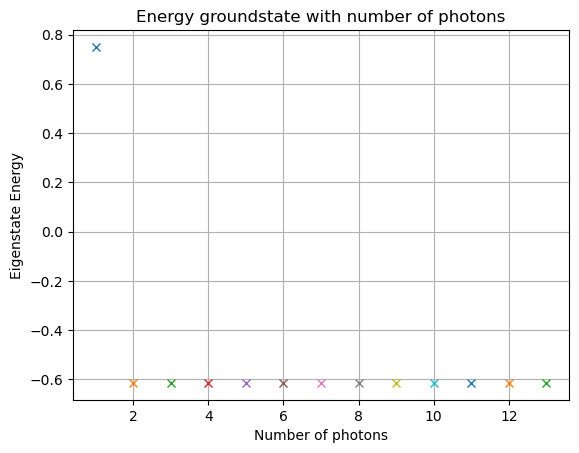

In [5]:
for N in range(2,15):
    g = 2
    a = tensor(destroy(N), qeye(2))
    sm = tensor(qeye(N), destroy(2))
    sigma_z = tensor(qeye(N), sigmaz())
    sigma_x = 
    na = sm.dag() * sm  # atom
    nc = a.dag() * a  # cavity

# decoupled Hamiltonian
    H0 = wc * a.dag() * a + wa * sigma_z * 0.5
    H_driven = OM_d * 
# interaction Hamiltonian
    if use_rwa:
        H1 = a.dag() * sm + a * sm.dag()
    else:
        H1 = (a.dag() + a) * (sm + sm.dag())
    H = H0 + g * H1
    gnd_energy, gnd_state = H.groundstate()
    g_0 = tensor(basis(N, 0), basis(2, 1))
    #gnd_energy = g_0.overlap(gnd_state)
    gnd_energy = H.eigenenergies()[1]
   # plt.plot(N-1, H.groundstate()[4] ,'x')
    plt.plot(N-1, np.real(gnd_energy) ,'x')
    # print(gnd_state, g_0)
   # print(H.groundstate())
    #print(gnd_energy)


plt.title('Energy groundstate with number of photons')
plt.ylabel('Eigenstate Energy')
plt.xlabel('Number of photons')
plt.grid()



## Energy eigenvalues for number of photons (undriven)

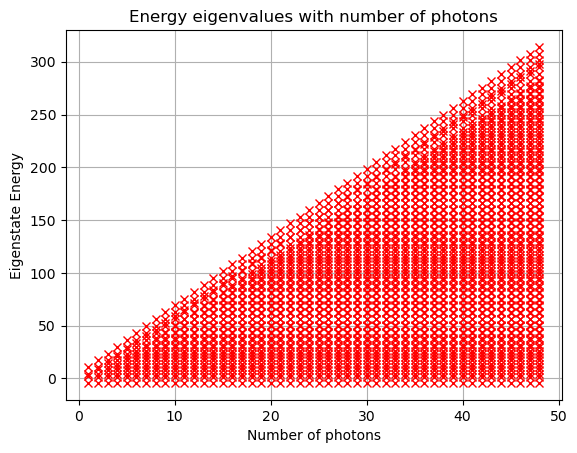

In [39]:
for N in range(2,50):
    g = 2
    a = tensor(destroy(N), qeye(2))
    sm = tensor(qeye(N), destroy(2))
    sigma_z = tensor(qeye(N), sigmaz())
    na = sm.dag() * sm  # atom
    nc = a.dag() * a  # cavity

# decoupled Hamiltonian
    H0 = wc * a.dag() * a + wa * sigma_z * 0.5

# interaction Hamiltonian
    if use_rwa:
        H1 = a.dag() * sm + a * sm.dag()
    else:
        H1 = (a.dag() + a) * (sm + sm.dag())
    H = H0 + g * H1
    gnd_energy, gnd_state = H.groundstate()
    g_0 = tensor(basis(N, N-1), basis(2, 1))
    # gnd_energy = g_0.overlap(H*g_0)
    energies = H.eigenenergies()
    # plt.plot(N-1, H.groundstate()[0] ,'x')
    for energy in energies:
        plt.plot(N-1,energy, 'x', color = 'red')



plt.title('Energy eigenvalues with number of photons')
plt.ylabel('Eigenstate Energy')
plt.xlabel('Number of photons')
plt.grid()

### for resonance case

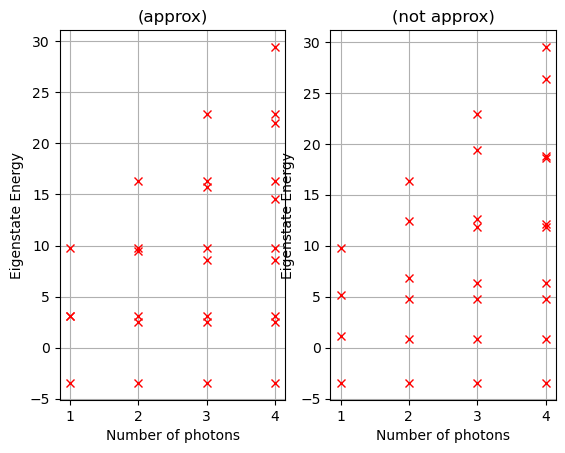

In [58]:
# set the frequencies to be equal to one another #

wc = 1.0 * 2 * np.pi # cavity frequency
wa = 1.0 * 2 * np.pi # atom frequency
wd = 1.5 * np.pi # driving frequency
OM_d = 1
# number of cavity fock states
use_rwa = True
plt.subplot(1,2,1)
for N in range(2,6):
    g = 2
    a = tensor(destroy(N), qeye(2))
    sm = tensor(qeye(N), destroy(2))
    sigma_z = tensor(qeye(N), sigmaz())
    na = sm.dag() * sm  # atom
    nc = a.dag() * a  # cavity

# decoupled Hamiltonian
    H0 = wc * a.dag() * a + wa * sigma_z * 0.5

# interaction Hamiltonian
    if use_rwa:
        H1 = a.dag() * sm + a * sm.dag()
    else:
        H1 = (a.dag() + a) * (sm + sm.dag())
    H = H0 + g * H1
    gnd_energy, gnd_state = H.groundstate()
    g_0 = tensor(basis(N, N-1), basis(2, 1))
    # gnd_energy = g_0.overlap(H*g_0)
    energies = H.eigenenergies()
    # plt.plot(N-1, H.groundstate()[0] ,'x')
    for energy in energies:
        plt.plot(N-1,energy, 'x', color = 'red')



plt.title('(approx)')
plt.ylabel('Eigenstate Energy')
plt.xlabel('Number of photons')
plt.grid()

plt.subplot(1,2,2)
for N in range(2,6):
    g = 2
    a = tensor(destroy(N), qeye(2))
    sm = tensor(qeye(N), destroy(2))
    sigma_z = tensor(qeye(N), sigmaz())
    na = sm.dag() * sm  # atom
    nc = a.dag() * a  # cavity

# decoupled Hamiltonian
    H0 = wc * a.dag() * a + wa * sigma_z * 0.5

# interaction Hamiltonian
   
    H1 = (a.dag() + a) * (sm + sm.dag())
    H = H0 + g * H1
    gnd_energy, gnd_state = H.groundstate()
    g_0 = tensor(basis(N, N-1), basis(2, 1))
    # gnd_energy = g_0.overlap(H*g_0)
    energies = H.eigenenergies()
    # plt.plot(N-1, H.groundstate()[0] ,'x')
    for energy in energies:
        plt.plot(N-1,energy, 'x', color = 'red')



plt.title('(not approx)')
plt.ylabel('Eigenstate Energy')
plt.xlabel('Number of photons')
plt.grid()



0.01911422269212141


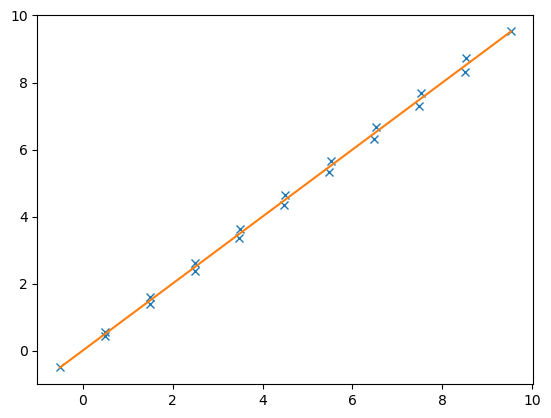

In [160]:
wc = np.sqrt(N) # cavity frequency
wa = np.sqrt(N) # atom frequency
eps = 1/wa
N = 10
O = 1
a = tensor(destroy(N), qeye(2))
sm = tensor(qeye(N), destroy(2))
sigma_z = tensor(qeye(N), sigmaz())
na = sm.dag() * sm  # atom
nc = a.dag() * a  # cavity

# decoupled Hamiltonian
H0 = a.dag() * a + sigma_z * 0.5

# interaction Hamiltonian
if use_rwa:
    H1 = a.dag() * sm + a * sm.dag()
else:
    H1 = (a.dag() + a) * (sm + sm.dag())
H = H0 + eps/2 * H1
gnd_energy, gnd_state = H.groundstate()
g_0 = tensor(basis(N, N-1), basis(2, 1))
    # gnd_energy = g_0.overlap(H*g_0)
energies1 = H.eigenenergies()
    # plt.plot(N-1, H.groundstate()[0] ,'x')
#print(energies)

H1 = (a.dag() + a) * (sm + sm.dag())
H = H0 + eps/2 * H1
gnd_energy, gnd_state = H.groundstate()
g_0 = tensor(basis(N, N-1), basis(2, 1))
    # gnd_energy = g_0.overlap(H*g_0)
energies2 = H.eigenenergies()
    # plt.plot(N-1, H.groundstate()[0] ,'x')
#print(energies)

plt.plot(energies1, energies2,'x')
plt.plot(energies1,energies1,'-')


print(mean_squared_error(energies2,energies1))



Text(0.5, 0, 'epsilon')

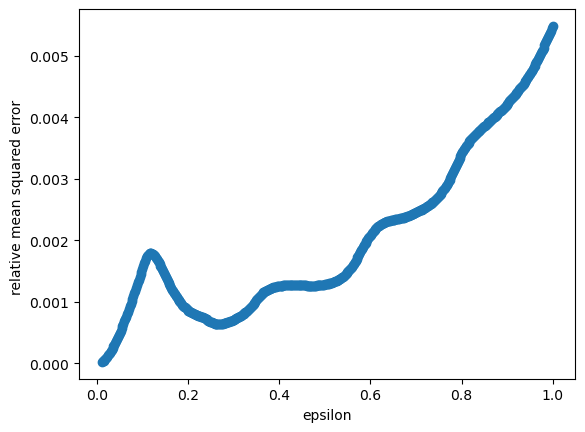

In [184]:
# changing omega values with rootmean square error


MSE = []
RMSE = []
epsilon = np.linspace(1e-2,1,500)
for i in epsilon:
    wa = wc = 1/i
    N = 100
    a = tensor(destroy(N), qeye(2))
    sm = tensor(qeye(N), destroy(2))
    sigma_z = tensor(qeye(N), sigmaz())
    na = sm.dag() * sm  # atom
    nc = a.dag() * a  # cavity

    # decoupled Hamiltonian with approx
    H0 = a.dag() * a + sigma_z * 0.5

    # interaction Hamiltonian
    if use_rwa:
        H1 = a.dag() * sm + a * sm.dag()
    else:
        H1 = (a.dag() + a) * (sm + sm.dag())
    H = H0 + i/2 * H1
    energies1 = H.eigenenergies()
    
    # without approx
    
    H1 = (a.dag() + a) * (sm + sm.dag())
    H = H0 + i/2 * H1
    gnd_energy, gnd_state = H.groundstate()
    energies2 = H.eigenenergies()
    mse = mean_squared_error(energies2, energies1)
    MSE.append(mse)
    
    if np.mean(energies2) < np.mean(energies1):
        rmse = mse / np.mean(energies1)
        RMSE.append(rmse)
    else:
        rmse = mse / np.mean(energies2)
        RMSE.append(rmse)
  

  
        
plt.plot(epsilon,RMSE,'o')    
plt.ylabel('relative mean squared error ')
plt.xlabel('epsilon')


In [110]:
omega

array([3.14159265e-02, 1.95419886e+00, 3.87698179e+00, 5.79976472e+00,
       7.72254766e+00, 9.64533059e+00, 1.15681135e+01, 1.34908965e+01,
       1.54136794e+01, 1.73364623e+01, 1.92592452e+01, 2.11820282e+01,
       2.31048111e+01, 2.50275940e+01, 2.69503770e+01, 2.88731599e+01,
       3.07959428e+01, 3.27187258e+01, 3.46415087e+01, 3.65642916e+01,
       3.84870746e+01, 4.04098575e+01, 4.23326404e+01, 4.42554234e+01,
       4.61782063e+01, 4.81009892e+01, 5.00237722e+01, 5.19465551e+01,
       5.38693380e+01, 5.57921210e+01, 5.77149039e+01, 5.96376868e+01,
       6.15604698e+01, 6.34832527e+01, 6.54060356e+01, 6.73288186e+01,
       6.92516015e+01, 7.11743844e+01, 7.30971674e+01, 7.50199503e+01,
       7.69427332e+01, 7.88655161e+01, 8.07882991e+01, 8.27110820e+01,
       8.46338649e+01, 8.65566479e+01, 8.84794308e+01, 9.04022137e+01,
       9.23249967e+01, 9.42477796e+01])


## Energies for number of photons in a driven system


In [42]:
pip install --upgrade ipywidgets

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: ipywidgets in c:\users\jnewh\anaconda3\lib\site-packages (7.6.5)
   ---------------------------------------- 0.0/139.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/139.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/139.8 kB ? eta -:--:--
   ----------- ---------------------------- 41.0/139.8 kB 2.0 MB/s eta 0:00:01
   ----------- ---------------------------- 41.0/139.8 kB 2.0 MB/s eta 0:00:01
   -------------------------------------- 139.8/139.8 kB 925.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/214.4 kB ? eta -:--:--
   -------------------------------------- - 204.8/214.4 kB 4.1 MB/s eta 0:00:01
   ---------------------------------------- 214.4/214.4 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.3 MB 8.6 MB/s eta 0:00:01
   ---------

In [27]:
wc = 1.0 * 2 * np.pi # cavity frequency
wa = 1.0 * 2.5 * np.pi # atom frequency
wd = 1.5 * np.pi # driving frequency
OM_d = 10
# number of cavity fock states
use_rwa = True

'''
t = 5 
slidert = widgets.FloatSlider(
    value=t,
    min=0,
    max=10,
    step=0.05,
    description='time',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
    layout=Layout(width='300px', height='50px'),
)

OM_d

sliderOM_d = widgets.FloatSlider(
    value=OM_d,
    min=0,
    max=10,
    step=0.05,
    description='Omega_d',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
    layout=Layout(width='300px', height='50px'),
)
'''

def plot_energies(t):
    t = 1
    plt.subplot(2,1,1)
    for N in range(2,6):
        g = 2
        a = tensor(destroy(N), qeye(2))
        sm = tensor(qeye(N), destroy(2))
        sigma_z = tensor(qeye(N), sigmaz())
        sigma_x = tensor(qeye(N), sigmax())
        na = sm.dag() * sm  # atom
        nc = a.dag() * a  # cavity
        
        # decoupled Hamiltonian
        H0 = wc * a.dag() * a + wa * sigma_z * 0.5
        H_driven = OM_d * np.cos(wd*t)*sigma_x 
        # interaction Hamiltonian
        if use_rwa:
            H1 = a.dag() * sm + a * sm.dag()
        else:
            H1 = (a.dag() + a) * (sm + sm.dag())
        H = H0 + (g * H1) + H_driven
        g_0 = tensor(basis(N, N-1), basis(2, 1))
        # gnd_energy = g_0.overlap(H*g_0)
        energies = H.eigenenergies()
        # plt.plot(N-1, H.groundstate()[0] ,'x')
        for energy in energies:
            plt.plot(N-1,energy, 'o', color = 'red')
           
    plt.title('Energy eigenvalues with number of photons (driven) with approx')
    plt.ylabel(f'Eigenstate Energy at time {t}')
    plt.xlabel('Number of photons')
    plt.grid()
    plt.show()









def plot_energies2(t):
    plt.subplot(2,1,2)
    t = 1
    for N in range(2,6):
        g = 2
        a = tensor(destroy(N), qeye(2))
        sm = tensor(qeye(N), destroy(2))
        sigma_z = tensor(qeye(N), sigmaz())
        sigma_x = tensor(qeye(N), sigmax())
        na = sm.dag() * sm  # atom
        nc = a.dag() * a  # cavity
        
        # decoupled Hamiltonian
        H0 = wc * a.dag() * a + wa * sigma_z * 0.5
        H_driven = OM_d * np.cos(wd*t)*sigma_x 
        # interaction Hamiltonian
        H1 = (a.dag() + a) * (sm + sm.dag())
        H = H0 + (g * H1) + H_driven
        g_0 = tensor(basis(N, N-1), basis(2, 1))
        # gnd_energy = g_0.overlap(H*g_0)
        energies = H.eigenenergies()
        # plt.plot(N-1, H.groundstate()[0] ,'x')
        for energy in energies:
            plt.plot(N-1,energy, 'o', color = 'red')
           
    plt.title('Energy eigenvalues with number of photons (driven) without approx')
    plt.ylabel(f'Eigenstate Energy at time {t}')
    plt.xlabel('Number of photons')
    plt.grid()
    





interact(plot_energies, t=FloatSlider(min=0.01, max=100, step=0.1, value=1))
interact(plot_energies2, t=FloatSlider(min=0.01, max=100, step=0.1, value=1))

interactive(children=(FloatSlider(value=1.0, description='t', min=0.01), Output()), _dom_classes=('widget-inte…

interactive(children=(FloatSlider(value=1.0, description='t', min=0.01), Output()), _dom_classes=('widget-inte…

<function __main__.plot_energies2(t)>

In [37]:
# lookgin at the eigenstates under resonance 

wc = 1.0 * 2 * np.pi # cavity frequency
wa = 1.0 * 2 * np.pi # atom frequency
wd = 2 * np.pi # driving frequency
OM_d = 10
# number of cavity fock states
use_rwa = True



def plot_energies(t):
    plt.subplot(2,1,1)
    for N in range(2,6):
        g = 2
        a = tensor(destroy(N), qeye(2))
        sm = tensor(qeye(N), destroy(2))
        sigma_z = tensor(qeye(N), sigmaz())
        sigma_x = tensor(qeye(N), sigmax())
        na = sm.dag() * sm  # atom
        nc = a.dag() * a  # cavity
        
        # decoupled Hamiltonian
        H0 = wc * a.dag() * a + wa * sigma_z * 0.5
        H_driven = OM_d * np.cos(wd*t)*sigma_x 
        # interaction Hamiltonian
        if use_rwa:
            H1 = a.dag() * sm + a * sm.dag()
        else:
            H1 = (a.dag() + a) * (sm + sm.dag())
        H = H0 + (g * H1) + H_driven
        g_0 = tensor(basis(N, N-1), basis(2, 1))
        # gnd_energy = g_0.overlap(H*g_0)
        energies = H.eigenenergies()
        # plt.plot(N-1, H.groundstate()[0] ,'x')
        for energy in energies:
            plt.plot(N-1,energy, 'o', color = 'red')
           
    plt.title('Energy eigenvalues with number of photons (driven) with approx')
    plt.ylabel(f'Eigenstate Energy at time {t}')
    plt.xlabel('Number of photons')
    plt.grid()
    plt.show()


def plot_energies2(t):
    plt.subplot(2,1,2)
    for N in range(2,6):
        g = 2
        a = tensor(destroy(N), qeye(2))
        sm = tensor(qeye(N), destroy(2))
        sigma_z = tensor(qeye(N), sigmaz())
        sigma_x = tensor(qeye(N), sigmax())
        na = sm.dag() * sm  # atom
        nc = a.dag() * a  # cavity
        
        # decoupled Hamiltonian
        H0 = wc * a.dag() * a + wa * sigma_z * 0.5
        H_driven = OM_d * np.cos(wd*t)*sigma_x 
        # interaction Hamiltonian
        H1 = (a.dag() + a) * (sm + sm.dag())
        H = H0 + (g * H1) + H_driven
        g_0 = tensor(basis(N, N-1), basis(2, 1))
        # gnd_energy = g_0.overlap(H*g_0)
        energies = H.eigenenergies()
        # plt.plot(N-1, H.groundstate()[0] ,'x')
        for energy in energies:
            plt.plot(N-1,energy, 'o', color = 'red')
           
    plt.title('Energy eigenvalues with number of photons (driven) without approx')
    plt.ylabel(f'Eigenstate Energy at time {t}')
    plt.xlabel('Number of photons')
    plt.grid()


interact(plot_energies, t=FloatSlider(min=0.01, max=100, step=0.1, value=1))
interact(plot_energies2, t=FloatSlider(min=0.01, max=100, step=0.1, value=1))

interactive(children=(FloatSlider(value=1.0, description='t', min=0.01), Output()), _dom_classes=('widget-inte…

interactive(children=(FloatSlider(value=1.0, description='t', min=0.01), Output()), _dom_classes=('widget-inte…

<function __main__.plot_energies2(t)>

In [35]:
# checking the errors for driven case
wc = 1.0 * 2 * np.pi # cavity frequency
wa = 1.0 * 2.5 * np.pi # atom frequency
wd = 1.5 * np.pi # driving frequency
OM_d = 10
def plot_energies(t):
    for N in range(2,6):
        use_rwa = True
        g = 2
        a = tensor(destroy(N), qeye(2))
        sm = tensor(qeye(N), destroy(2))
        sigma_z = tensor(qeye(N), sigmaz())
        sigma_x = tensor(qeye(N), sigmax())
        na = sm.dag() * sm  # atom
        nc = a.dag() * a  # cavity
        
        # decoupled Hamiltonian
        H0 = wc * a.dag() * a + wa * sigma_z * 0.5
        H_driven = OM_d * np.cos(wd*t)*sigma_x 
        # interaction Hamiltonian
        if use_rwa:
            H1 = a.dag() * sm + a * sm.dag()
        else:
            H1 = (a.dag() + a) * (sm + sm.dag())
        H = H0 + (g * H1) + H_driven
        g_0 = tensor(basis(N, N-1), basis(2, 1))
        # gnd_energy = g_0.overlap(H*g_0)
        energies = H.eigenenergies()

        use_rwa = False

        if use_rwa:
            H1 = a.dag() * sm + a * sm.dag()
        else:
            H1 = (a.dag() + a) * (sm + sm.dag())
        H = H0 + (g * H1) + H_driven
        g_0 = tensor(basis(N, N-1), basis(2, 1))
        # gnd_energy = g_0.overlap(H*g_0)
        energies2 = H.eigenenergies()
        # plt.plot(N-1, H.groundstate()[0] ,'x')
        plt.plot(energies,energies2, 'o', color = 'red')
        plt.plot(energies2,energies2, '-', color = 'black')   
    plt.title('Energy eigenvalues with number of photons (driven) with approx')
    plt.ylabel(f'Eigenstate no rwa Energy  at time {t}')
    plt.xlabel(f'Eigenstate rwa Energy  at time {t}')
    plt.grid()
    plt.show()

    


interact(plot_energies, t=FloatSlider(min=0.01, max=100, step=0.1, value=1))

interactive(children=(FloatSlider(value=1.0, description='t', min=0.01), Output()), _dom_classes=('widget-inte…

<function __main__.plot_energies(t)>

In [56]:
# difference plot with time


def plot_energies(t):
    for N in range(2,6):
        use_rwa = True
        g = 2
        a = tensor(destroy(N), qeye(2))
        sm = tensor(qeye(N), destroy(2))
        sigma_z = tensor(qeye(N), sigmaz())
        sigma_x = tensor(qeye(N), sigmax())
        na = sm.dag() * sm  # atom
        nc = a.dag() * a  # cavity
        
        # decoupled Hamiltonian
        H0 = wc * a.dag() * a + wa * sigma_z * 0.5
        H_driven = OM_d * np.cos(wd*t)*sigma_x 
        # interaction Hamiltonian
        if use_rwa:
            H1 = a.dag() * sm + a * sm.dag()
        else:
            H1 = (a.dag() + a) * (sm + sm.dag())
        H = H0 + (g * H1) + H_driven
        g_0 = tensor(basis(N, N-1), basis(2, 1))
        # gnd_energy = g_0.overlap(H*g_0)
        energies = H.eigenenergies()

        use_rwa = False

        if use_rwa:
            H1 = a.dag() * sm + a * sm.dag()
        else:
            H1 = (a.dag() + a) * (sm + sm.dag())
        H = H0 + (g * H1) + H_driven
        g_0 = tensor(basis(N, N-1), basis(2, 1))
        # gnd_energy = g_0.overlap(H*g_0)
        energies2 = H.eigenenergies()
        # plt.plot(N-1, H.groundstate()[0] ,'x')
        plt.plot(energies,abs(energies2-energies), 'o', color = 'red')
    plt.title('Error in the energy when approximating')
    plt.ylabel(f'Energy error at time {t}')
    plt.xlabel(f'Eigenstate rwa Energy  at time {t}')
    plt.grid()
    plt.show()

    


interact(plot_energies, t=FloatSlider(min=0.01, max=100, step=0.1, value=1))

interactive(children=(FloatSlider(value=1.0, description='t', min=0.01), Output()), _dom_classes=('widget-inte…

<function __main__.plot_energies(t)>

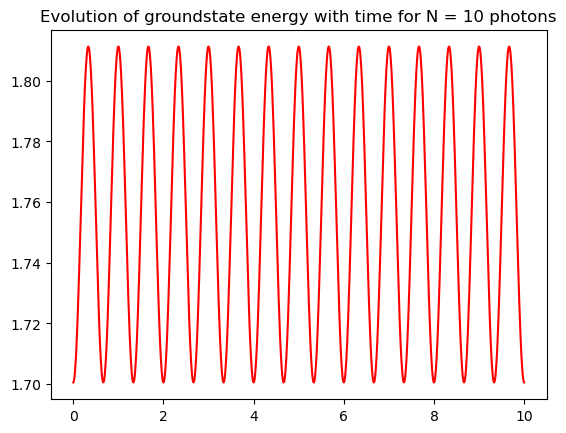

In [58]:
# evolution of an eigenstate with time 
wc = 1.0 * 2 * np.pi # cavity frequency
wa = 1.0 * 2.5 * np.pi # atom frequency
wd = 1.5 * np.pi # driving frequency
OM_d = 1
time = np.linspace(0,10,1000)
g_energies = []
for t in time:
        N = 10
        use_rwa = True
        g = 2
        a = tensor(destroy(N), qeye(2))
        sm = tensor(qeye(N), destroy(2))
        sigma_z = tensor(qeye(N), sigmaz())
        sigma_x = tensor(qeye(N), sigmax())
        na = sm.dag() * sm  # atom
        nc = a.dag() * a  # cavity
        
        # decoupled Hamiltonian
        H0 = wc * a.dag() * a + wa * sigma_z * 0.5
        H_driven = OM_d * np.cos(wd*t)*sigma_x 
        # interaction Hamiltonian
        if use_rwa:
            H1 = a.dag() * sm + a * sm.dag()
        else:
            H1 = (a.dag() + a) * (sm + sm.dag())
        H = H0 + (g * H1) + H_driven
        g_0 = tensor(basis(N, N-1), basis(2, 1))
        # gnd_energy = g_0.overlap(H*g_0)
        g_energy = H.eigenenergies()[1]
        g_energies.append(g_energy)
        '''
        use_rwa = False
        if use_rwa:
            H1 = a.dag() * sm + a * sm.dag()
        else:
            H1 = (a.dag() + a) * (sm + sm.dag())
        H = H0 + (g * H1) + H_driven
        g_0 = tensor(basis(N, N-1), basis(2, 1))
        # gnd_energy = g_0.overlap(H*g_0)
        energies2 = H.eigenenergies()
        '''
        # plt.plot(N-1, H.groundstate()[0] ,'x')
plt.plot(time,g_energies, '-', color = 'red')
plt.title('Evolution of groundstate energy with time for N = 10 photons')
        #plt.plot(energies2,energies2, '-', color = 'black') 
plt.show()
    


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
import ipywidgets as widgets

# Function to update the plot based on the frequency from the slider
def plot_sine_wave(frequency):
    x = np.linspace(0, 2 * np.pi, 100)
    y = np.sin(frequency * x)
    plt.figure(figsize=(8, 4))
    plt.plot(x, y)
    plt.ylim(-1, 1)
    plt.title(f"Sine Wave with Frequency {frequency}")
    plt.xlabel("x")
    plt.ylabel("sin(frequency * x)")
    plt.show()

# Interactive slider connected to the plot function
interact(plot_sine_wave, frequency=FloatSlider(min=0.1, max=5, step=0.1, value=1))


interactive(children=(FloatSlider(value=1.0, description='frequency', max=5.0, min=0.1), Output()), _dom_class…

<function __main__.plot_sine_wave(frequency)>

In [35]:
def plot_energies(t):
    for N in range(2,6):
        g = 2
        a = tensor(destroy(N), qeye(2))
        sm = tensor(qeye(N), destroy(2))
        sigma_z = tensor(qeye(N), sigmaz())
        sigma_x = tensor(qeye(N), sigmax())
        na = sm.dag() * sm  # atom
        nc = a.dag() * a  # cavity
        
        # decoupled Hamiltonian
        H0 = wc * a.dag() * a + wa * sigma_z * 0.5
        H_driven = OM_d * np.cos(wd*t)*(a + a.dag())
        # interaction Hamiltonian
        H1 = g*wc*(a + a.dag())*sigma_x
        H = H0 + (g * H1) + H_driven
        g_0 = tensor(basis(N, N-1), basis(2, 1))
        # gnd_energy = g_0.overlap(H*g_0)
        energies = H.eigenenergies()
        # plt.plot(N-1, H.groundstate()[0] ,'x')
        for energy in energies:
            plt.plot(N-1,energy, 'o', color = 'red')
            
    plt.title('Energy eigenvalues with number of photons (driven)')
    plt.ylabel(f'Eigenstate Energy at time {t}')
    plt.xlabel('Number of photons')
    plt.grid()
    plt.show()


interact(plot_energies, t=FloatSlider(min=0.01, max=1, step=0.1, value=1))

interactive(children=(FloatSlider(value=1.0, description='t', max=1.0, min=0.01), Output()), _dom_classes=('wi…

<function __main__.plot_energies(t)>

In [19]:
N = 2
g = 2
a = tensor(destroy(N), qeye(2))
sm = tensor(qeye(N), destroy(2))
sigma_z = tensor(qeye(N), sigmaz())
sigma_x = tensor(qeye(N), sigmax())
na = sm.dag() * sm  # atom
nc = a.dag() * a  # cavity


for t in range(0,10):
        # decoupled Hamiltonian
    H0 = wc * a.dag() * a + wa * sigma_z * 0.5
    H_driven = OM_d * np.cos(wd*t)*(a + a.dag())
        # interaction Hamiltonian
    H1 = g*wc*(a + a.dag())*sigma_x
    H = H0 + (g * H1) + H_driven
    eigenstates = H.eigenstates()
    for eigenstate in eigenstates:
        print(a*eigenstate)
  
 

TypeError: operand 'Qobj' does not support ufuncs (__array_ufunc__=None)

In [1]:
# check the eigenvalues under resonance for with and without wave approximation

g_0

NameError: name 'g_0' is not defined

In [7]:
N = 2
g_0 = tensor(basis(N, N-1), basis(2, 1))
g_0

Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [0.]
 [1.]]

In [10]:
#everything combined
from qutip import QobjEvo, num, coefficient, fock
import numpy as np

class Hamiltonian:
    def __init__(self, wa, wc, Omega, N, rwa, driven):
        self.wa = wa
        self.wc = wc
        self.Omega = Omega
        self._Hjc(N, rwa = rwa, driven =driven)
    def _Hjc (self, N, rwa = False, driven = False):
        # N = number of photon states (number of photons + 1(no photon state) )
        Omega = self.Omega
        wc = self.wc
        wa = self.wa
        sigma_z = -tensor(qeye(N), sigmaz())
        a = tensor(destroy(N), qeye(2))
        a_dag = a.dag()
        sm = tensor(qeye(N),destroy(2))
        sigma_x = -tensor(qeye(N),sigmax()) #for the qubit system

        #either that or
        #psi0 = tensor(fock(N, 0), fock(2,1) )
        #psi1 = tensor(fock(N, 1), fock(2,1) )   
        H0 = wc * a.dag() * a + wa/2 * sigma_z
        coeff = coefficient(lambda t: np.cos(w*t))

        if rwa == True:
            if driven == True:
                self.H_JC = Omega/2 * ((a.dag() * sm) + (sm.dag()*a))  + H0 + (f * sigma_x)  * coeff
            else:
                self.H_JC = Omega/2 * ((a.dag() * sm) + (sm.dag()*a)) +H0
        else:
            if driven == True:
                self.H_JC = Omega/2 * (a.dag() + a) * (sm + sm.dag())   + H0 + (f * sigma_x)  * coeff
            else:
                self.H_JC = Omega/2 * (a.dag() + a) * (sm + sm.dag()) +H0

C:\Users\jnewh\anaconda3\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\jnewh\anaconda3\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\jnewh\anaconda3\Lib\site-packages\matplotlib\collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


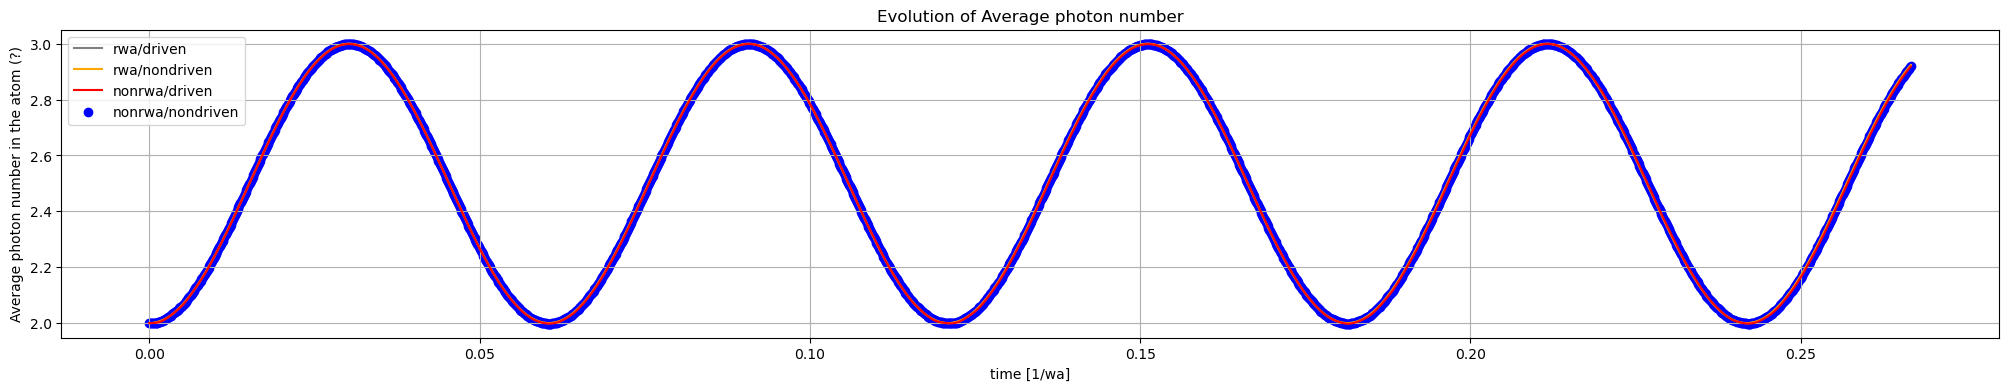

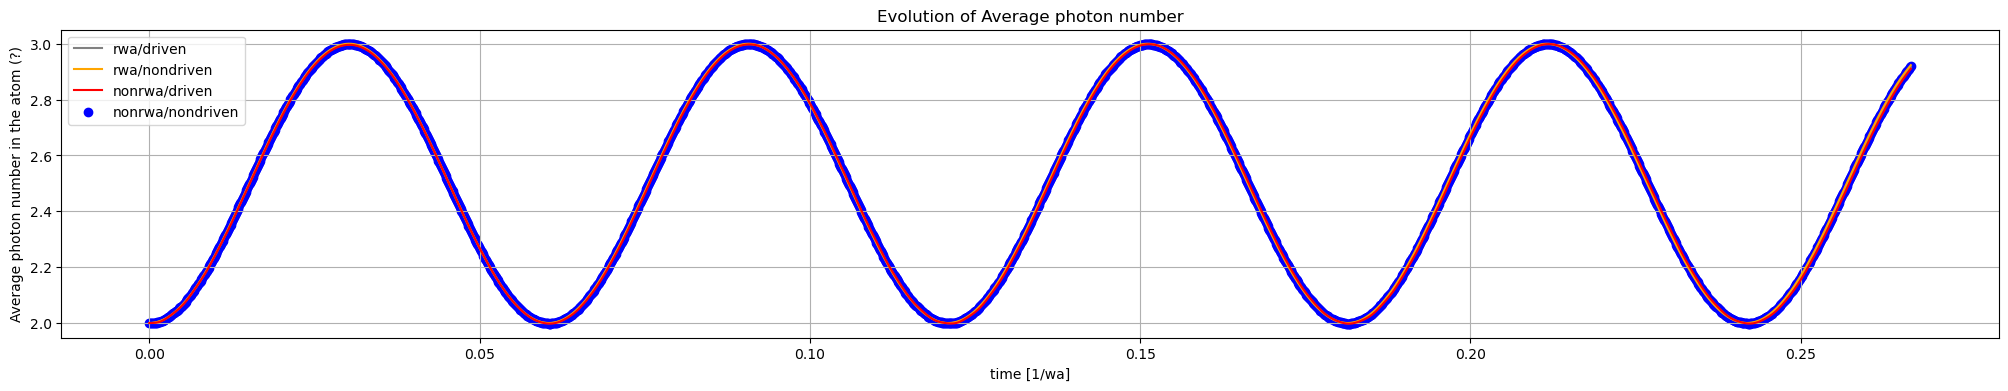

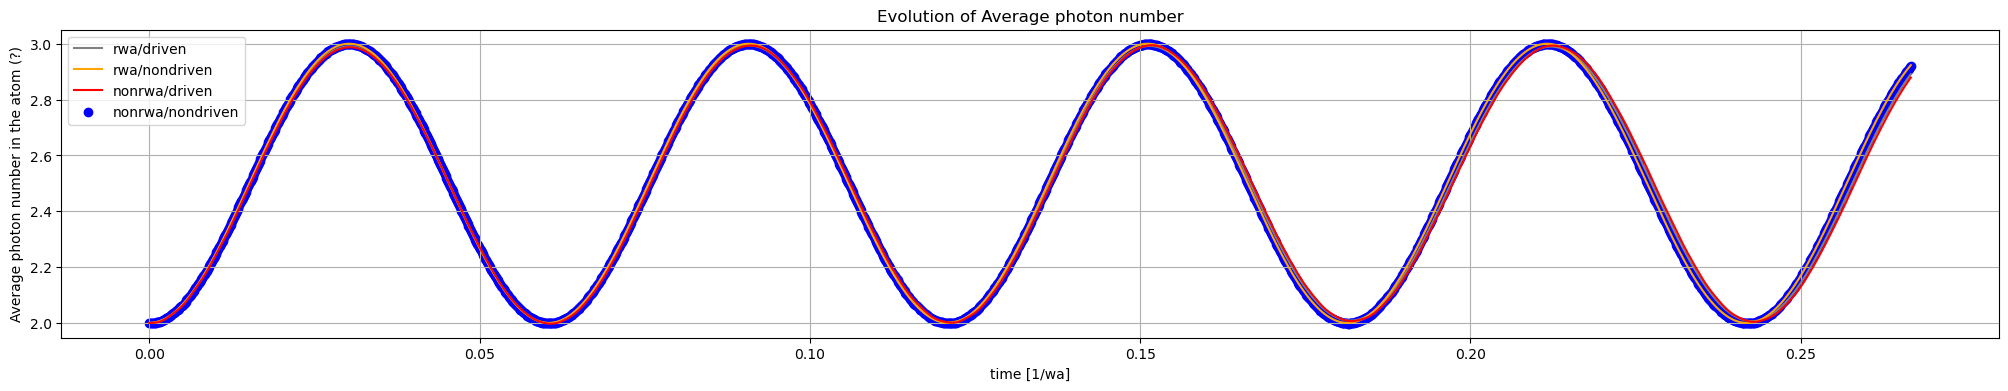

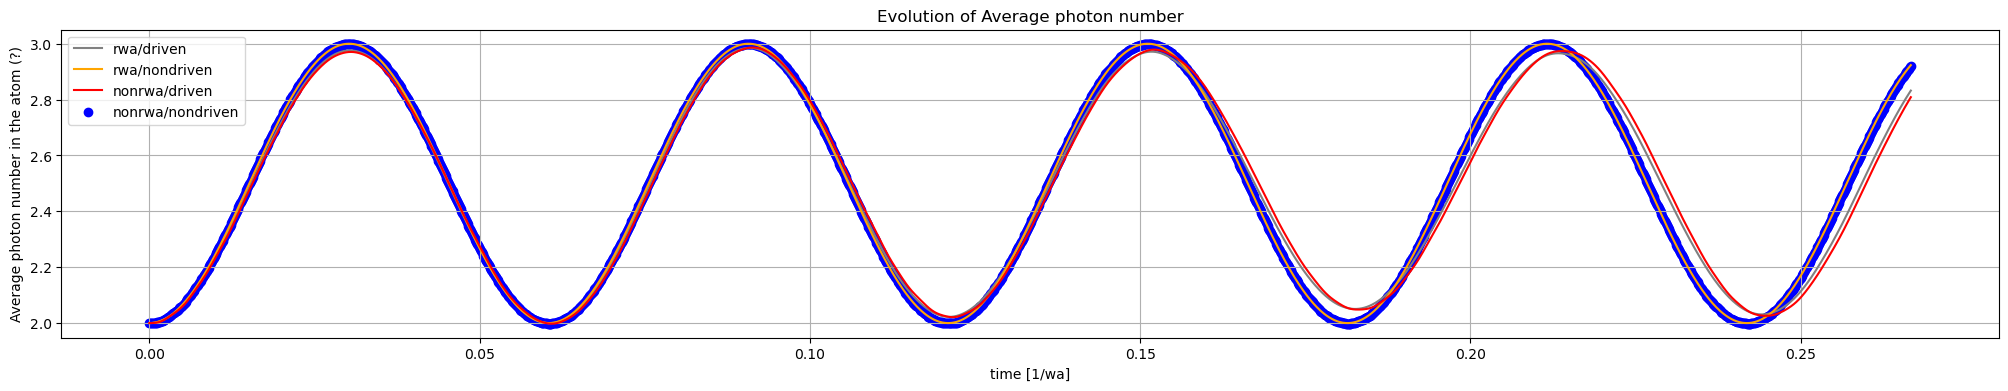

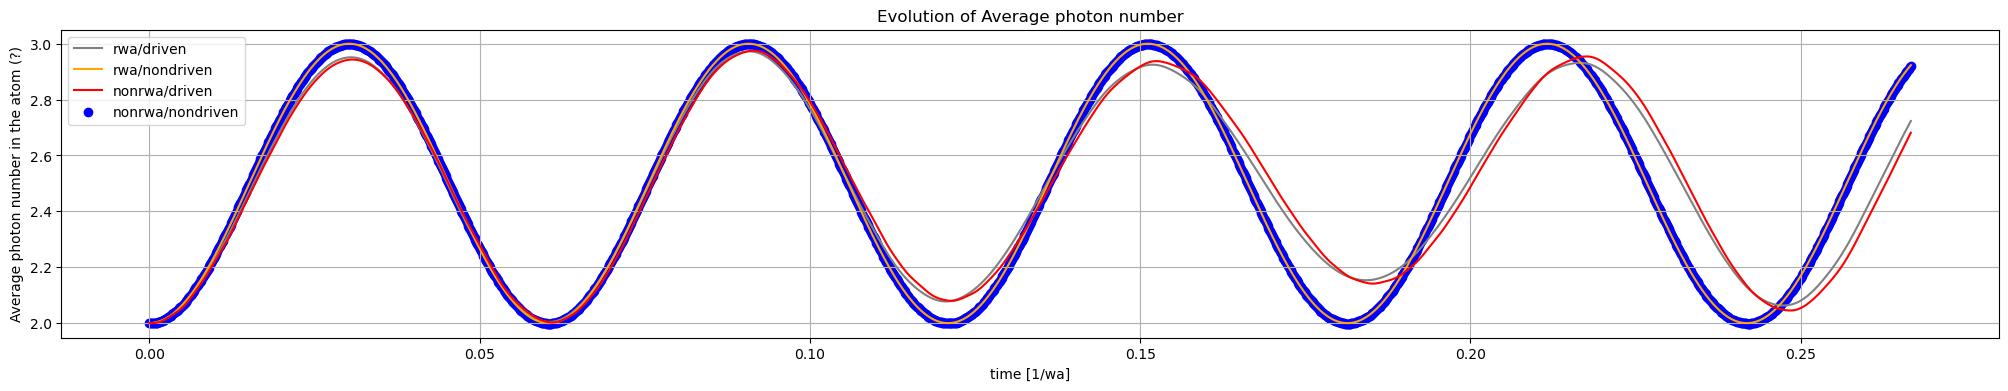

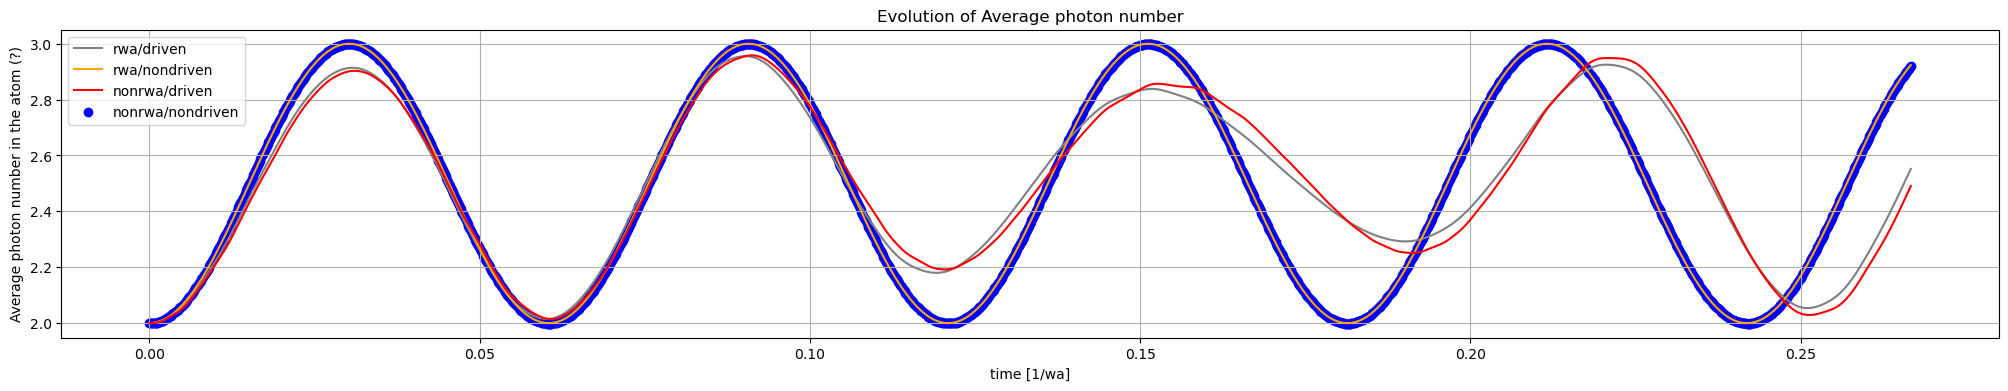

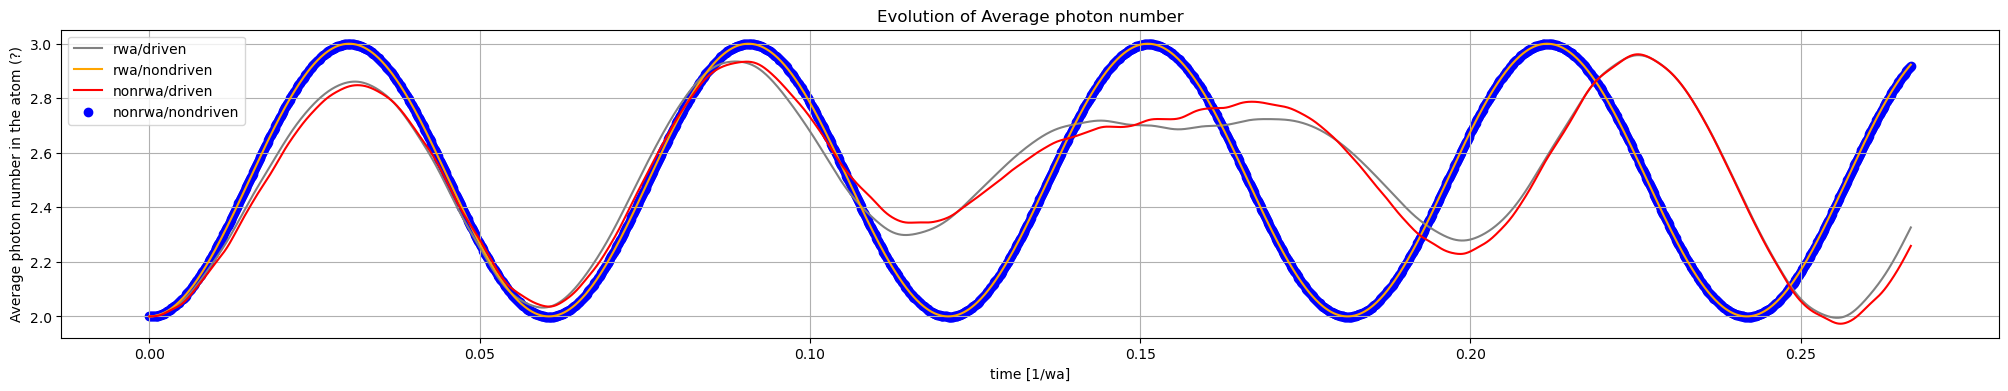

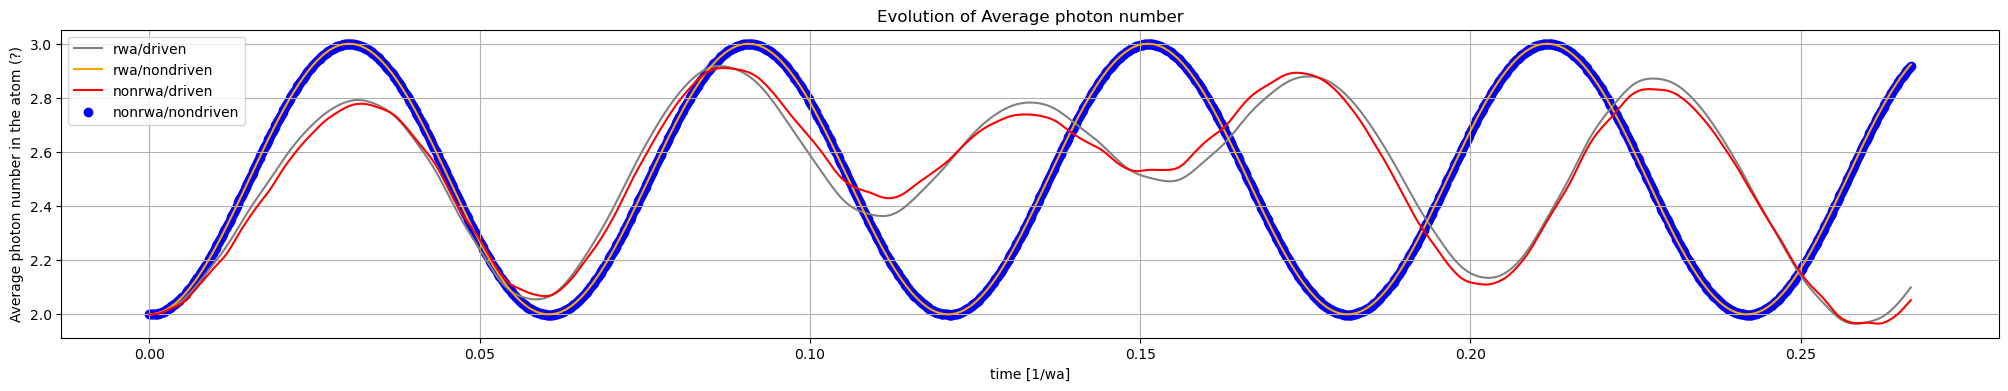

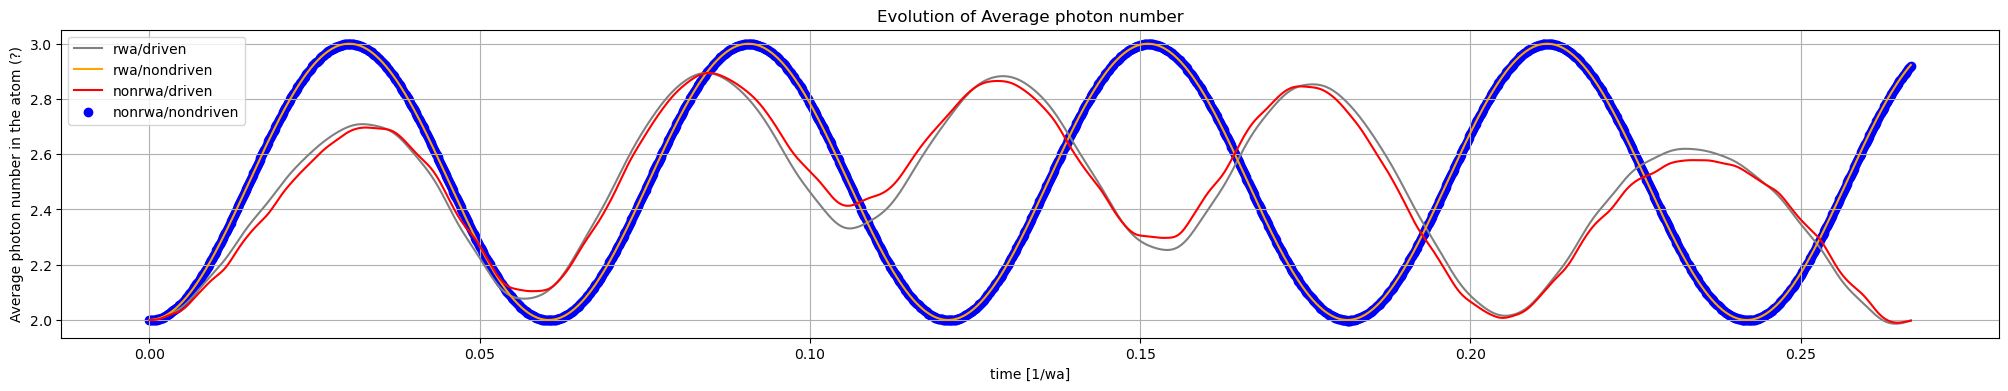

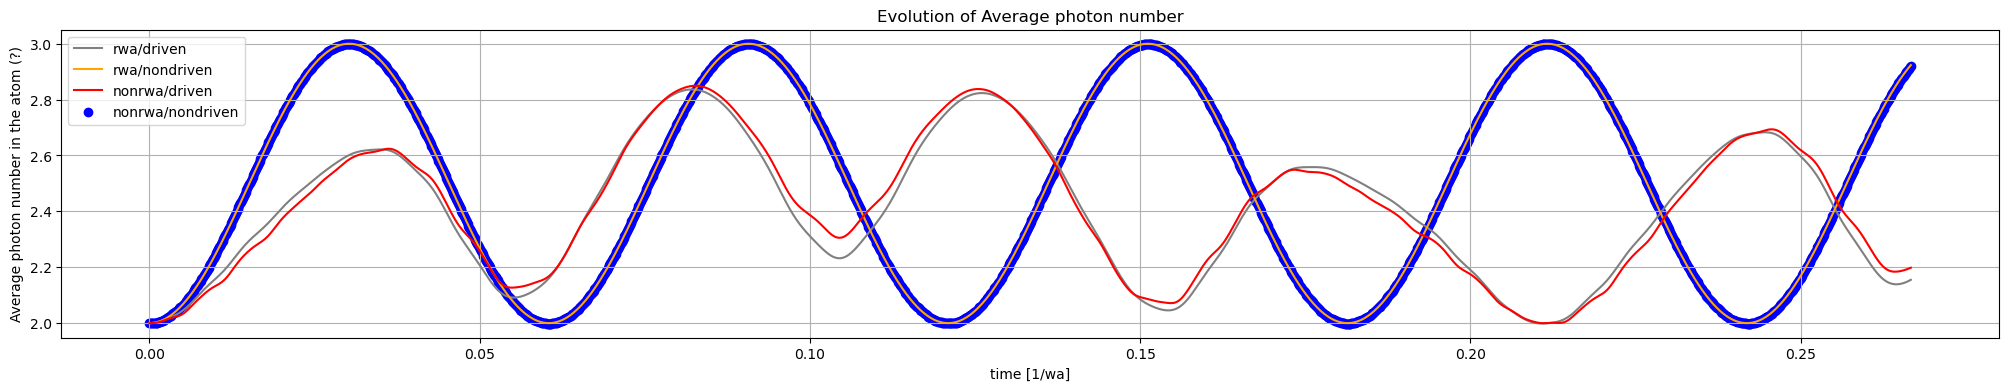

In [12]:
wc= 30
wa= 30
d = wa-wc
Omega = 2
N= 5
w= 2
psi0 = tensor(fock(N, 3), fock(2,0) )
psi1 = tensor(fock(N, 2), fock(2,1) )
a = tensor(destroy(N), qeye(2))
a_dag = a.dag()
n= a_dag*a
for f in range(0,10):
    
    H_JC_rwa_driven = Hamiltonian( wa, wc, Omega, N, True,True).H_JC
    H_JC_rwa_nondriven = Hamiltonian( wa, wc, Omega, N, True,False).H_JC
    H_JC_nonrwa_driven = Hamiltonian( wa, wc, Omega, N ,False,True).H_JC
    H_JC_nonrwa_nondriven = Hamiltonian( wa, wc, Omega, N ,False,False).H_JC
    times = np.linspace(0.0, 8, 2000)
    tau =times
    mpl.rc("figure", figsize=(25, 4))
    results_rwa_driven=mesolve(H_JC_rwa_driven, psi1, tau)
    states_rwa_driven=results_rwa_driven.states
    
    results_rwa_nondriven=mesolve(H_JC_rwa_nondriven, psi1, tau)
    states_rwa_nondriven=results_rwa_nondriven.states
    
    results_nonrwa_driven=mesolve(H_JC_nonrwa_driven, psi1, tau)
    states_nonrwa_driven=results_nonrwa_driven.states
    
    results_nonrwa_nondriven=mesolve(H_JC_nonrwa_nondriven, psi1, tau)
    states_nonrwa_nondriven=results_nonrwa_nondriven.states
    
    # Visualize the results
    expect_rwa_driven = [np.sqrt(((n*states_rwa_driven[i]).overlap(states_rwa_driven[i]))*np.conjugate((n*states_rwa_driven[i]).overlap(states_rwa_driven[i]))) for i in range(len(tau))]
    expect_rwa_nondriven = [np.sqrt(((n*states_rwa_nondriven[i]).overlap(states_rwa_nondriven[i]))*np.conjugate((n*states_rwa_nondriven[i]).overlap(states_rwa_nondriven[i]))) for i in range(len(tau))]
    expect_nonrwa_driven = [np.sqrt(((n*states_nonrwa_driven[i]).overlap(states_nonrwa_driven[i]))*np.conjugate((n*states_nonrwa_driven[i]).overlap(states_nonrwa_driven[i]))) for i in range(len(tau))]
    expect_nonrwa_nondriven = [np.sqrt(((n*states_nonrwa_nondriven[i]).overlap(states_nonrwa_nondriven[i]))*np.conjugate((n*states_nonrwa_nondriven[i]).overlap(states_nonrwa_nondriven[i]))) for i in range(len(tau))]
    plt.plot(tau/wa, expect_rwa_driven, label = 'rwa/driven',color="grey")
    plt.plot(tau/wa, expect_rwa_nondriven, label = 'rwa/nondriven',color="orange")
    plt.plot(tau/wa, expect_nonrwa_driven, label = 'nonrwa/driven',color="red")
    plt.scatter(tau/wa, expect_nonrwa_nondriven, label = 'nonrwa/nondriven',color="b")
    plt.legend()
    plt.xlabel('time [1/wa]')
    plt.ylabel('Average photon number in the atom (?)')
    plt.title('Evolution of Average photon number')
    plt.grid()
    plt.show()

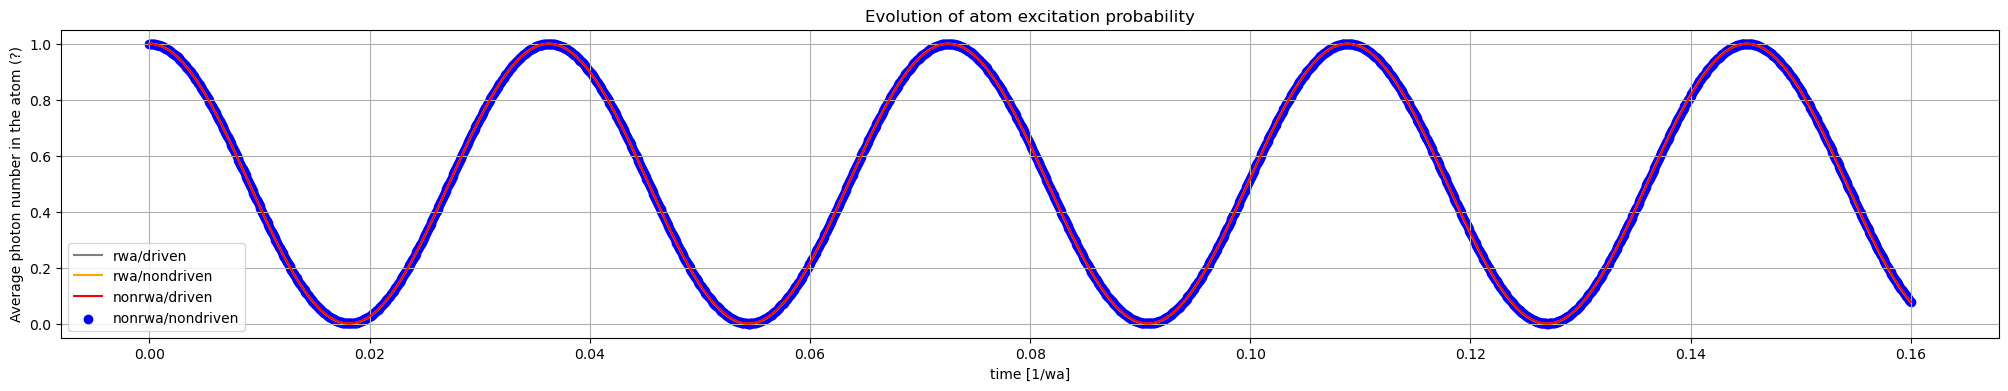

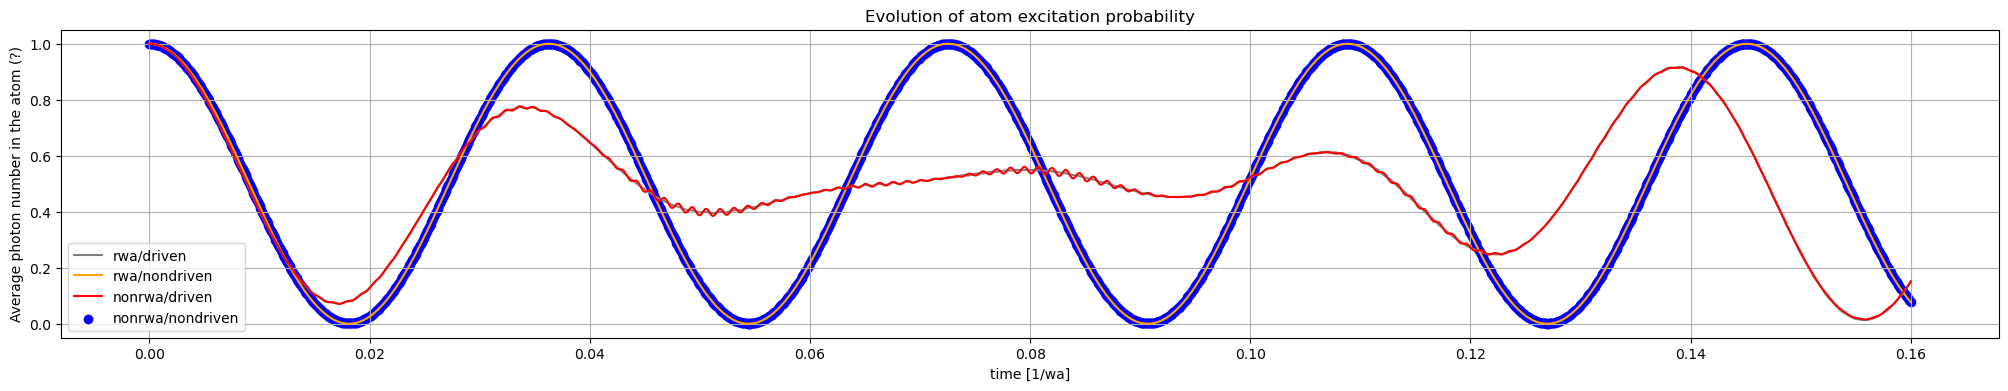

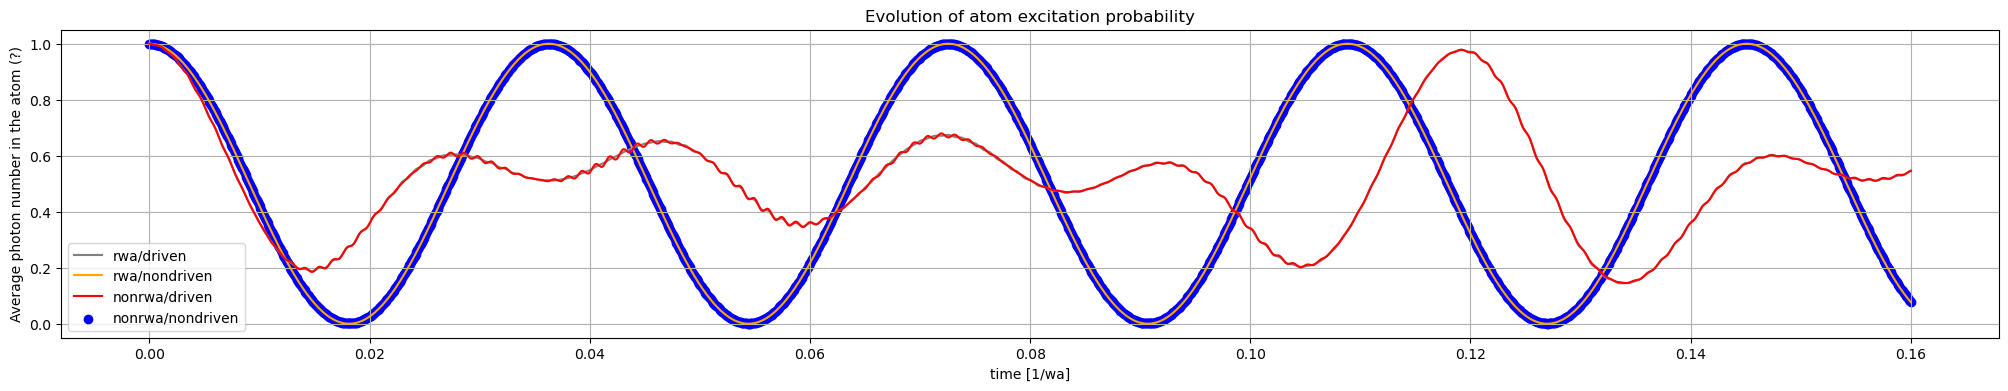

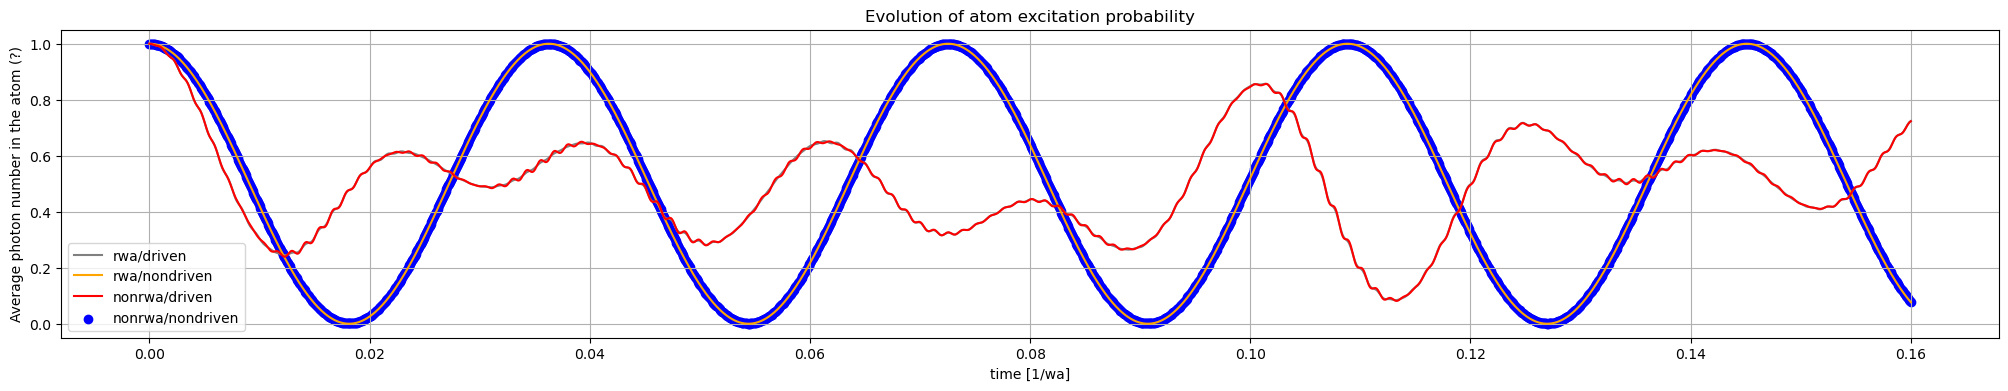

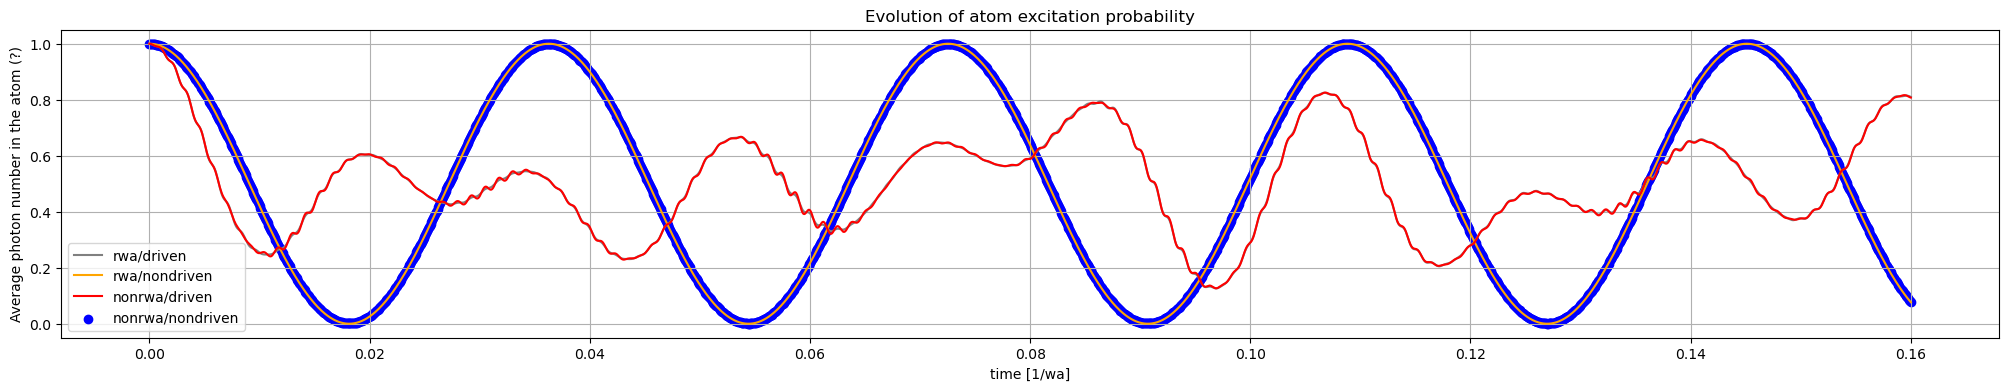

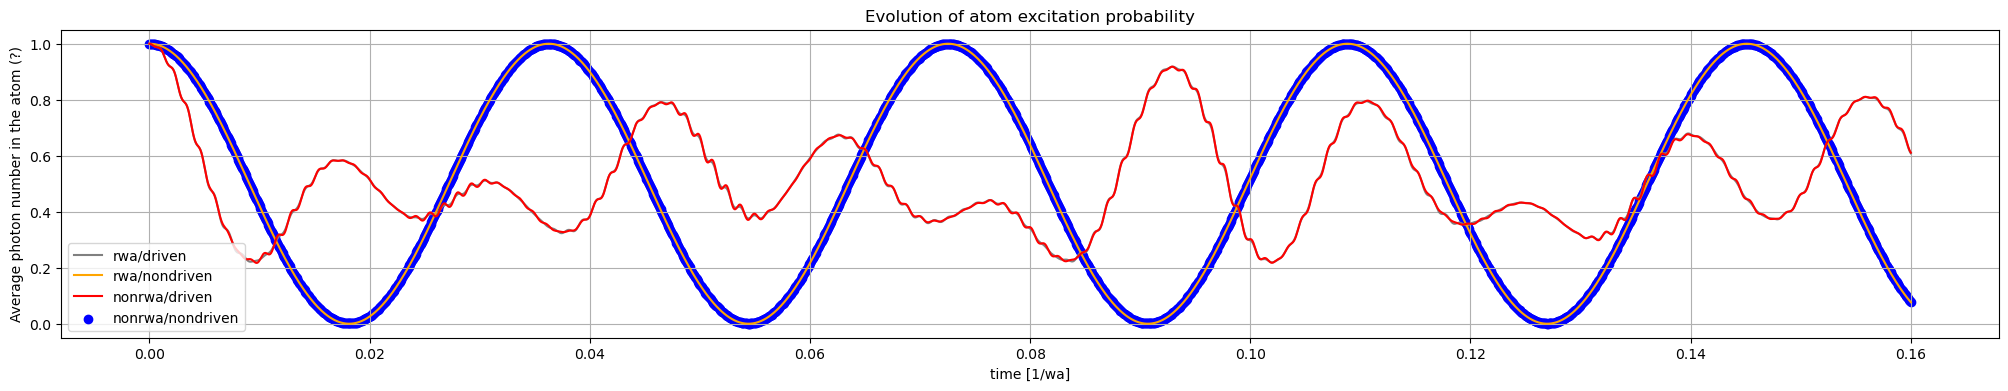

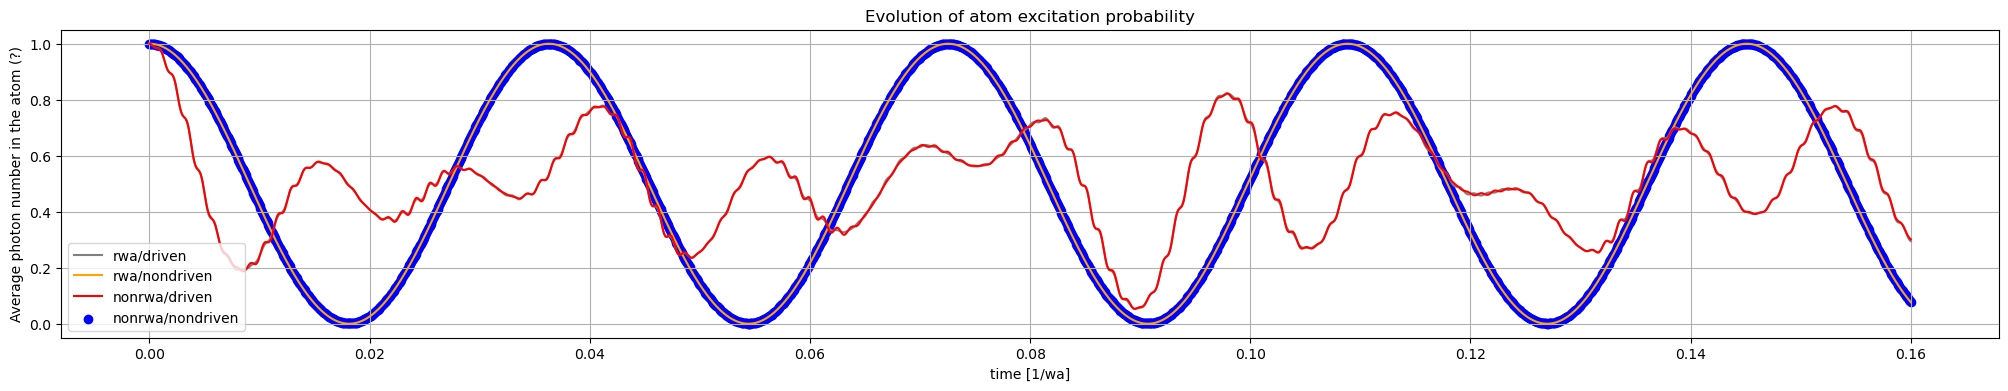

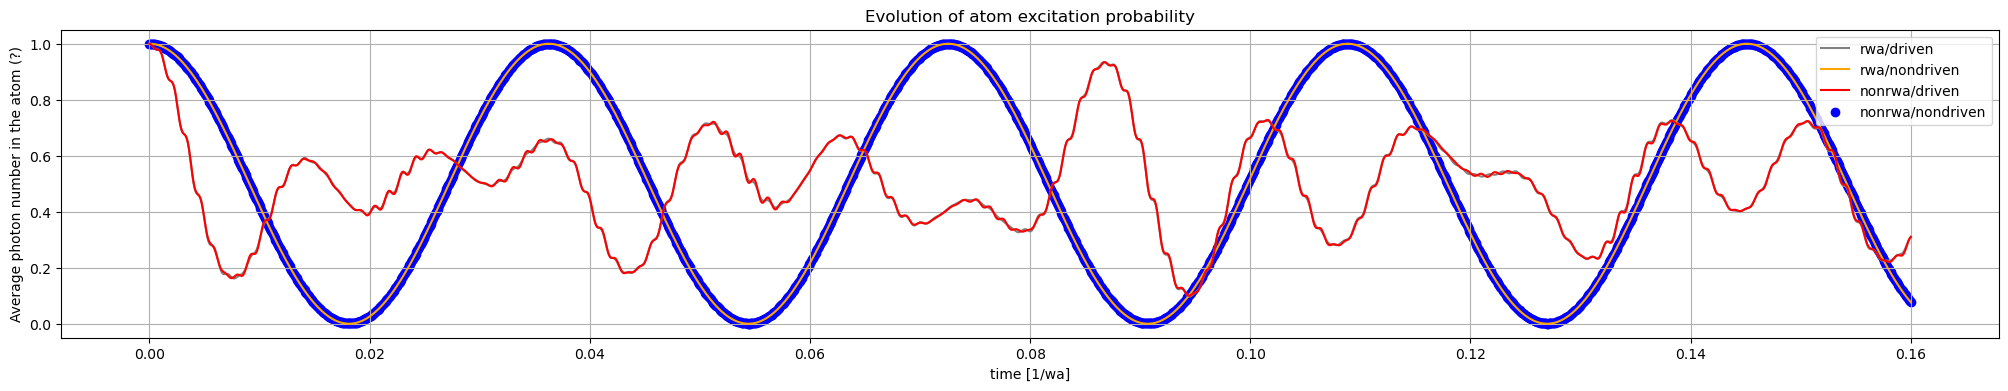

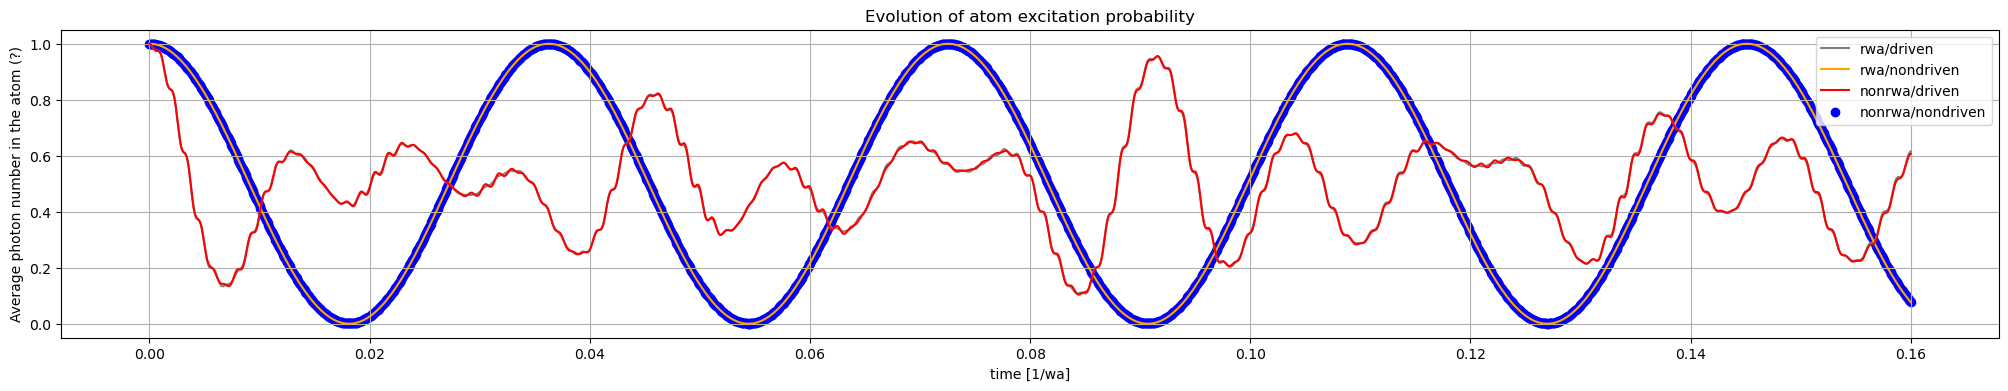

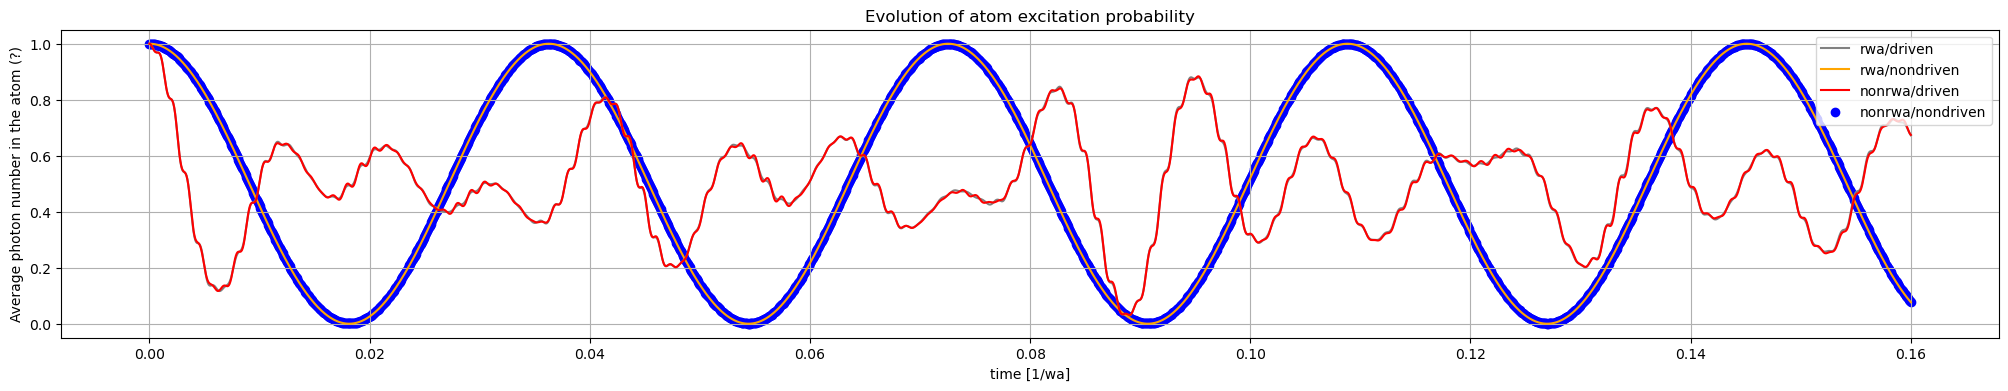

In [26]:
## plottting the probability that the atom is excited

wc= 50
wa= 50
d = wa-wc
Omega = 2
N= 5
w= 50
psi0 = tensor(fock(N, 3), fock(2,0) )
psi1 = tensor(fock(N, 2), fock(2,1) )
a = tensor(destroy(N), qeye(2))
a_dag = a.dag()
n= a_dag*a
for f in range(0,10):
    
    H_JC_rwa_driven = Hamiltonian( wa, wc, Omega, N, True,True).H_JC
    H_JC_rwa_nondriven = Hamiltonian( wa, wc, Omega, N, True,False).H_JC
    H_JC_nonrwa_driven = Hamiltonian( wa, wc, Omega, N ,False,True).H_JC
    H_JC_nonrwa_nondriven = Hamiltonian( wa, wc, Omega, N ,False,False).H_JC
    times = np.linspace(0.0, 8, 2000)
    tau =times
    mpl.rc("figure", figsize=(25, 4))
    results_rwa_driven=mesolve(H_JC_rwa_driven, psi1, tau)
    states_rwa_driven=results_rwa_driven.states
    
    results_rwa_nondriven=mesolve(H_JC_rwa_nondriven, psi1, tau)
    states_rwa_nondriven=results_rwa_nondriven.states
    
    results_nonrwa_driven=mesolve(H_JC_nonrwa_driven, psi1, tau)
    states_nonrwa_driven=results_nonrwa_driven.states
    
    results_nonrwa_nondriven=mesolve(H_JC_nonrwa_nondriven, psi1, tau)
    states_nonrwa_nondriven=results_nonrwa_nondriven.states

    a = tensor(destroy(N), qeye(2))
    sm = tensor(qeye(N), destroy(2))
    na = sm.dag() * sm  # atom
    na_expt1 = expect(na, states_rwa_driven)  # qubit  occupation probability
    na_expt2 = expect(na, states_rwa_nondriven)  # qubit  occupation probability
    na_expt3 = expect(na, states_nonrwa_driven)  # qubit  occupation probability
    na_expt4 = expect(na, states_nonrwa_nondriven)  # qubit  occupation probability
    plt.plot(tau/wa, na_expt1, label = 'rwa/driven',color="grey")
    plt.plot(tau/wa, na_expt2, label = 'rwa/nondriven',color="orange")
    plt.plot(tau/wa, na_expt3, label = 'nonrwa/driven',color="red")
    plt.scatter(tau/wa, na_expt4, label = 'nonrwa/nondriven',color="b")
    plt.legend()
    plt.xlabel('time [1/wa]')
    plt.ylabel('Average photon number in the atom (?)')
    plt.title('Evolution of atom excitation probability')
    plt.grid()
    plt.show()


    



In [ ]:
plt.plot()
plt.plot()
plt.plot()
plt.plot()